# 서포트벡터머신 - 이진분류
---
- 피마인디언 당뇨병 데이터셋

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1.데이터 준비

In [66]:
# !wget https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

In [67]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [68]:
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [71]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### 2.테스트데이터 분리

In [72]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
X = df.drop("Outcome", axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [74]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [75]:
# 사이킷런 함수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [76]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [77]:
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

In [78]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

### 3.전처리

#### 결측치

In [79]:
X_train.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

#### 이상치

In [80]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
711,5,126,78,27,22,29.6,0.439,40
373,2,105,58,40,94,34.9,0.225,25
46,1,146,56,0,0,29.7,0.564,29
682,0,95,64,39,105,44.6,0.366,22


- 0인값을 가진 샘플을 지우기

In [81]:
df1 = X_train.copy()
df1.shape

(614, 8)

In [82]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [83]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [84]:
df1 = df1[cols].replace(0, np.nan)
df1.isna().sum()

Glucose            4
BloodPressure     23
SkinThickness    175
Insulin          290
BMI                9
dtype: int64

In [85]:
df1 = df1.dropna()
df1.shape

(322, 5)

In [86]:
# y_train[df1.index]

- 0인 값을 적당한 값으로 채워넣는 방법

In [87]:
df2 = X_train.copy()
df2.shape

(614, 8)

In [88]:
df2[cols] = df2[cols].replace(0, np.nan)
df2.isna().sum()

Pregnancies                   0
Glucose                       4
BloodPressure                23
SkinThickness               175
Insulin                     290
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [89]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [90]:
df2['Glucose']= df2['Glucose'].fillna( df2['Glucose'].median())
df2['BloodPressure']= df2['BloodPressure'].fillna( df2['BloodPressure'].median())
df2['SkinThickness']= df2['SkinThickness'].fillna( df2['SkinThickness'].median())
df2['Insulin']= df2['Insulin'].fillna( df2['Insulin'].median())
df2['BMI']= df2['BMI'].fillna( df2['BMI'].median())

In [91]:
G_m = df2['Glucose'].median()
B_m = df2['BloodPressure'].median()
S_m = df2['SkinThickness'].median()
I_m = df2['Insulin'].median()
Bmi_m = df2['BMI'].median()

In [92]:
df2.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [93]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,3.819218,3.314148,0.000,1.000,3.0000,6.00000,17.000
Glucose,614.0,121.671010,30.003794,56.000,99.000,117.0000,140.00000,199.000
BloodPressure,614.0,72.140065,12.275119,24.000,64.000,72.0000,80.00000,122.000
SkinThickness,614.0,29.042345,8.891855,7.000,25.000,29.0000,32.00000,99.000
Insulin,614.0,137.705212,78.764767,15.000,120.000,125.0000,130.00000,744.000
BMI,614.0,32.448208,6.824122,18.200,27.625,32.4000,36.50000,67.100
DiabetesPedigreeFunction,614.0,0.477428,0.330300,0.084,0.245,0.3825,0.63925,2.329
Age,614.0,33.366450,11.833438,21.000,24.000,29.0000,41.00000,81.000


#### 스케일링

In [94]:
X_train = df2.copy()

In [95]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40
373,2,105.0,58.0,40.0,94.0,34.9,0.225,25
46,1,146.0,56.0,29.0,125.0,29.7,0.564,29
682,0,95.0,64.0,39.0,105.0,44.6,0.366,22


In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_train_s

array([[-0.85135507, -1.05642747, -0.82674004, ..., -0.76969431,
         0.31079384, -0.79216928],
       [ 0.35657564,  0.14439907,  0.47777235, ..., -0.41771394,
        -0.11643851,  0.56103382],
       [-0.5493724 , -0.55608308, -1.15286813, ...,  0.35957603,
        -0.76486207, -0.70759409],
       ...,
       [-0.85135507, -0.82293342, -0.17448384, ...,  0.82888319,
        -0.78607218, -0.28471812],
       [ 1.86648903, -0.35594533, -0.17448384, ..., -0.72569676,
        -1.01938346,  0.56103382],
       [ 0.05459296,  0.74481233, -1.15286813, ..., -0.43237979,
        -0.57700104,  0.30730824]])

In [97]:
scaler.mean_

array([  3.81921824, 121.67100977,  72.14006515,  29.04234528,
       137.70521173,  32.44820847,   0.47742834,  33.36644951])

In [98]:
scaler.var_

array([1.09656893e+01, 8.98761472e+02, 1.50433150e+02, 7.89363176e+01,
       6.19378444e+03, 4.64927900e+01, 1.08920587e-01, 1.39802197e+02])

In [99]:
y_train = y_train.values
type(y_train)

numpy.ndarray

### 4.학습
- SVC 베이스 모델

In [100]:
from sklearn.svm import SVC
def trainer(data, label):

    clf = SVC(random_state=42)
    return clf.fit(data, label)


In [101]:
svc_clf = trainer(X_train_s, y_train)

### 5.예측

In [102]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159,64,0,0,27.4,0.294,40
672,10,68,106,23,49,35.5,0.285,47
700,2,122,76,27,200,35.9,0.483,26
630,7,114,64,0,0,27.4,0.732,34
81,2,74,0,0,0,0.0,0.102,22


테스트 데이터 전처리 먼저
- 0인값을 위에서 계산한 값으로 넣는작업
- 스케일링

In [103]:
# X_test -> X_test_s
# precdict
# 정확도

In [104]:
df3 = X_test.copy()
df3[cols] = X_test[cols].replace(0, np.NaN)
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159.0,64.0,NaN,NaN,27.4,0.294,40
672,10,68.0,106.0,23.0,49.0,35.5,0.285,47
700,2,122.0,76.0,27.0,200.0,35.9,0.483,26
630,7,114.0,64.0,NaN,NaN,27.4,0.732,34
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22
...,...,...,...,...,...,...,...,...
32,3,88.0,58.0,11.0,54.0,24.8,0.267,22
637,2,94.0,76.0,18.0,66.0,31.6,0.649,23
593,2,82.0,52.0,22.0,115.0,28.5,1.699,25
425,4,184.0,78.0,39.0,277.0,37.0,0.264,31


In [105]:
df3.isna().sum()

Pregnancies                  0
Glucose                      1
BloodPressure               12
SkinThickness               52
Insulin                     84
BMI                          2
DiabetesPedigreeFunction     0
Age                          0
dtype: int64

In [106]:
df3["Glucose"] = df3["Glucose"].fillna(G_m)
df3["BloodPressure"] = df3["BloodPressure"].fillna(B_m)
df3["SkinThickness"] = df3["SkinThickness"].fillna(S_m)
df3["Insulin"] = df3["Insulin"].fillna(I_m)
df3["BMI"] = df3["BMI"].fillna(Bmi_m)
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159.0,64.0,29.0,125.0,27.4,0.294,40
672,10,68.0,106.0,23.0,49.0,35.5,0.285,47
700,2,122.0,76.0,27.0,200.0,35.9,0.483,26
630,7,114.0,64.0,29.0,125.0,27.4,0.732,34
81,2,74.0,72.0,29.0,125.0,32.4,0.102,22


In [107]:
X_test = df3.copy()
X_test_s = scaler.fit_transform(X_test)

In [108]:
y_pred = svc_clf.predict(X_test_s)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.7402597402597403


## Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

params = {
    "C" : [1],
    "gamma" : [1],
    "degree" : [2, 3],
    "kernel" : ["linear", "poly", "rbf"]
}

grid_cv = GridSearchCV(SVC(), params, cv=5, refit=True, verbose=3)
grid_cv.fit(X_train_s, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END C=1, degree=2, gamma=1, kernel=linear;, score=0.772 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=1, kernel=linear;, score=0.748 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=1, kernel=linear;, score=0.772 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=1, kernel=linear;, score=0.803 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=1, kernel=poly;, score=0.659 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=1, kernel=poly;, score=0.699 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=1, kernel=poly;, score=0.675 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=1, kernel=poly;, score=0.705 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=1, kernel=rbf;, score=0.699 total time=   0.0s
[CV 2/5] END C=1, degree=2, g

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1], 'degree': [2, 3], 'gamma': [1],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [111]:
clf = SVC(C = 1, degree = 2, gamma = 0.01, kernel = 'rbf')
svc_clf = clf.fit(X_train_s, y_train)

In [112]:
y_pred = svc_clf.predict(X_test_s)
accuracy_score(y_test, y_pred)

0.7207792207792207

## Model Save

In [113]:
import pickle

with open("./model/svc_c_1_degree_2_gamma_001_kernel_rbf.pk", "wb")as f:
    pickle.dump(svc_clf, f)


In [114]:
import pickle

with open("./model/standard_scaler.pk", "wb")as f:
    pickle.dump(scaler, f)

## Model Read

In [115]:
with open("./model/svc_c_1_degree_2_gamma_001_kernel_rbf.pk", "rb") as f:
    svc_clf = pickle.load(f)


In [116]:
svc_clf

SVC(C=1, degree=2, gamma=0.01)

In [117]:
with open("./model/standard_scaler.pk", "rb") as f:
    scaler = pickle.load(f)


In [118]:
scaler.mean_

array([  3.94805195, 121.5974026 ,  73.37012987,  29.37012987,
       152.5       ,  32.49025974,   0.44974026,  32.74025974])

## KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
knn_clf = clf.fit(X_train_s, y_train)

In [121]:
y_pred = knn_clf.predict(X_test_s)
print(accuracy_score(y_pred, y_test))

0.7727272727272727


In [125]:
score = []

best = 0
for i in range(3, 100):
    clf = KNeighborsClassifier(i)
    knn_clf = clf.fit(X_train_s, y_train)

    y_pred = knn_clf.predict(X_test_s)
    acc = accuracy_score(y_pred, y_test)
    
    score.append(acc)
    if best < acc:
        best = acc
        print(f"new best : {acc}, k : {i}")


new best : 0.7337662337662337, k : 3
new best : 0.7727272727272727, k : 4
new best : 0.7792207792207793, k : 6
new best : 0.7922077922077922, k : 20


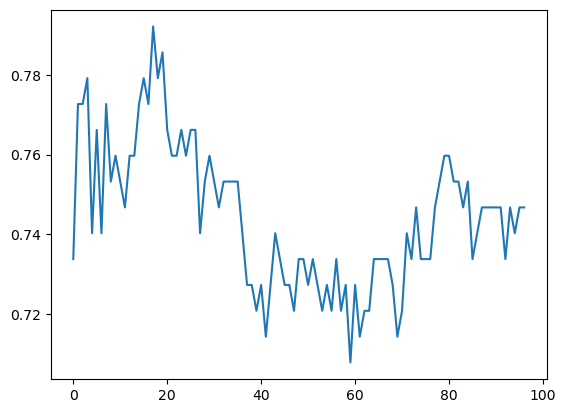

In [127]:
plt.plot(score)
plt.show()